In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv") 
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [9]:
train_original=train.copy() 
test_original=test.copy()

Visualize target variable

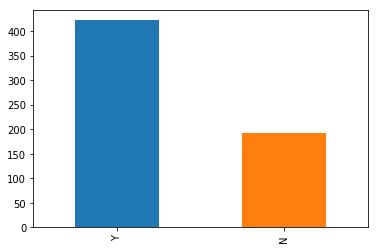

In [13]:
train_original['Loan_Status'].value_counts().plot.bar()

Independent Variable visualization

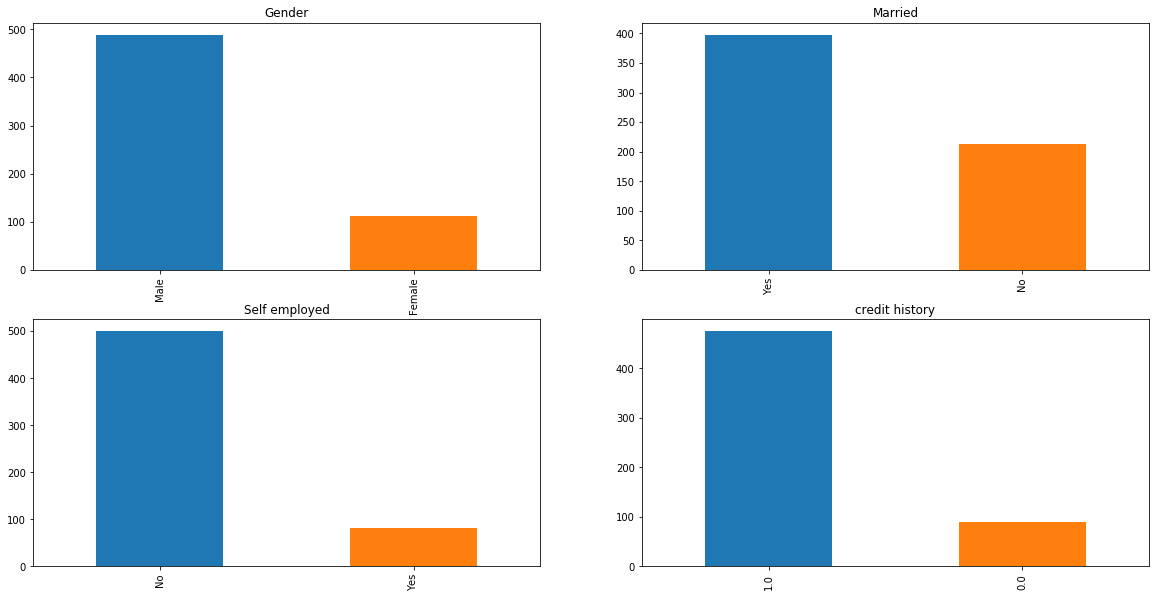

In [19]:
plt.figure(1) 
plt.subplot(221)
train_original['Gender'].value_counts().plot.bar(figsize=(20,10), title='Gender')
plt.subplot(222)
train_original['Married'].value_counts().plot.bar(title='Married')
plt.subplot(223)
train_original['Self_Employed'].value_counts().plot.bar(title='Self employed')
plt.subplot(224)
train_original['Credit_History'].value_counts().plot.bar(title='credit history')

Independent variable(ordinal) visualization


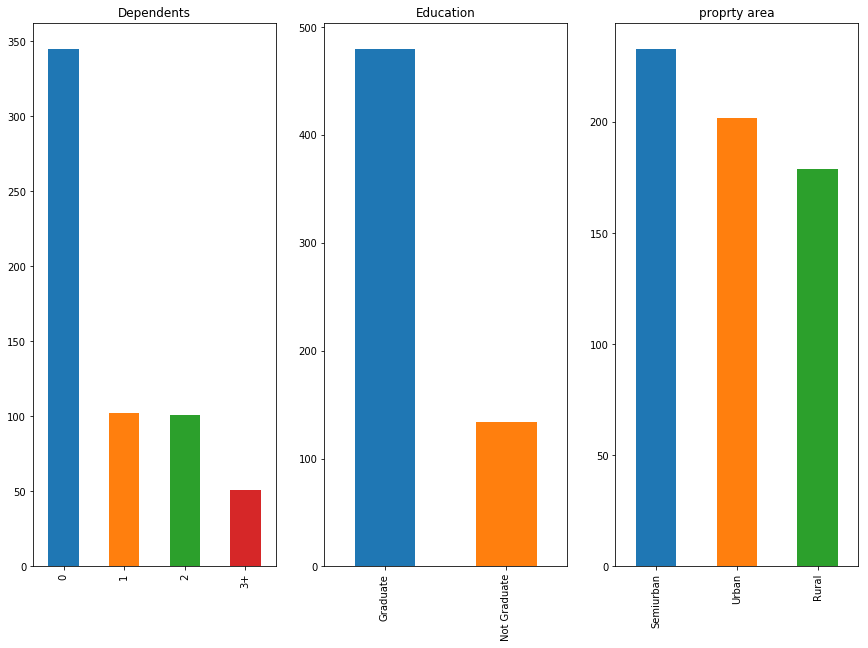

In [24]:
plt.figure(1)
plt.subplot(141)
train_original['Dependents'].value_counts().plot.bar(figsize=(20,10),title='Dependents')
plt.subplot(142)
train_original['Education'].value_counts().plot.bar(title='Education')
plt.subplot(143)
train_original['Property_Area'].value_counts().plot.bar(title='proprty area')


Independent Variable (Numerical) visualization

C:\Users\Ritu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


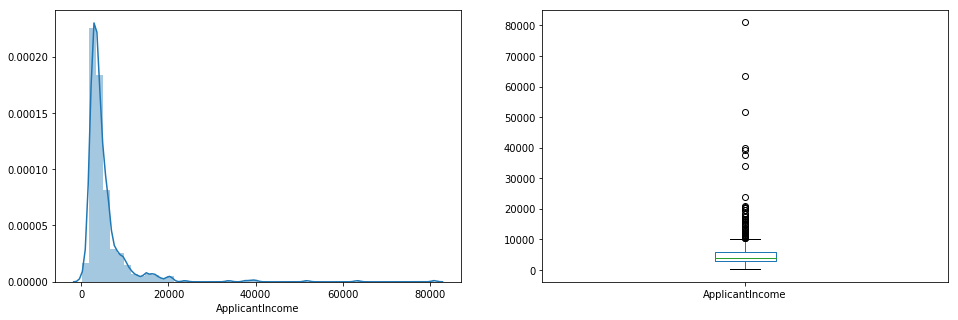

In [26]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome'])
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Text(0.5,0.98,'')

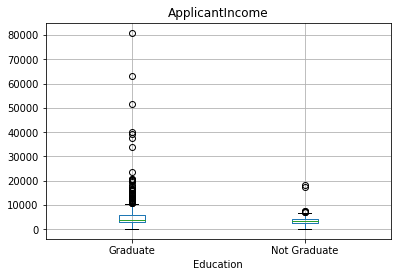

In [28]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

C:\Users\Ritu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


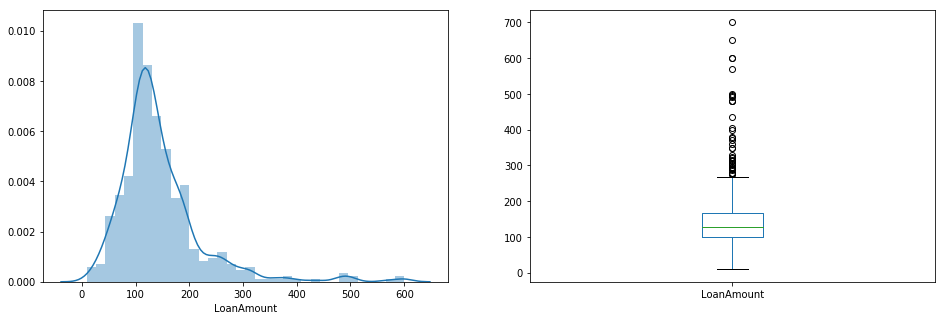

In [30]:
plt.figure(1)
plt.subplot(121)
df=train.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

handle null values(categorical)


In [31]:
train_original.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
train_original['Gender'].fillna(train_original['Gender'].mode()[0],inplace=True)
train_original['Married'].fillna(train_original['Married'].mode()[0],inplace=True)
train_original['Dependents'].fillna(train_original['Dependents'].mode()[0],inplace=True)
train_original['Credit_History'].fillna(train_original['Credit_History'].mode()[0],inplace=True)
train_original['Self_Employed'].fillna(train_original['Self_Employed'].mode()[0],inplace=True)

Handle null values for numeric 

In [44]:
train_original['LoanAmount'].fillna(train_original['LoanAmount'].median(),inplace=True)
train_original['Loan_Amount_Term'].fillna(train_original['Loan_Amount_Term'].median,inplace=True)

In [45]:
train_original.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

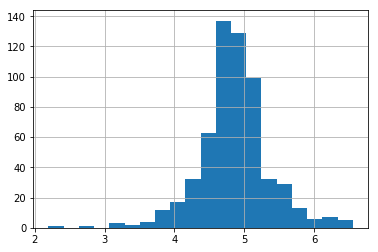

In [46]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [47]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [48]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [49]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)